<center>

# Final Data Project Clément VU e235756

</center>


#### *For this project, after cleaning up the data, I decided to work on the questions that would guide us during the project. I then proposed a success story, focusing on two companies that have succeeded in different ways, and highlighting the analyses we had carried out beforehand*
#### *In addition, I used VisualStudioCode (VSC) as source code editor to get closer to a working environment that could potentially await us in the future.  So it's possible that the interface and display of my jpnyb may change.*


#### *Problematic guideline :*
0. Data cleaning
1. Compare the revenue range of companies for every size of company (per employee) ?
2. In average, what type of company (category of company) is the most valuable ?
3. Which company has the largest number of acquisitions?
4. Which type of funding need the most money to be raised
5. How many companies have received at least one round of investment?
6. Which Company has the `most money_raised thanks to investment
7. What is the Investment the most valuable ?
8. Which type of funding is the most used nowaday
9. Which company cquired the most and for how much
10. Which of these companies have CEOs graduated from a top school?
11. Story


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import process
from forex_python.converter import CurrencyRates   

C:\Users\clmen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
df_company = pd.read_excel("2324MBD41_Project_Dataset.xlsx", sheet_name="COMPANY")
df_investment = pd.read_excel("2324MBD41_Project_Dataset.xlsx", sheet_name="INVESTMENT")
df_acquisition = pd.read_excel("2324MBD41_Project_Dataset.xlsx", sheet_name="ACQUISITION")
df_employee = pd.read_excel("2324MBD41_Project_Dataset.xlsx", sheet_name="EMPLOYEE")


## 0. `Data Cleaning`

In [3]:
import re

def remove_numbers(input_string): # function using a regex to only retrieve the currency sign
    return re.sub(r'\d+', '', input_string).replace(",", "") # First we remove all the numbers and we remove the trailing ","


##### To work with the `convert function based to the API forex python`, we need to work with numbers with the format 10000000 and not $10000000

In [4]:
#GROUPBY the column money_raised with the "$xxxxxx"
df_investment["Currency"] = df_investment["MONEY_RAISED"].apply(remove_numbers) # apply remove numbers function to get only the currency
df_investment = df_investment[df_investment.Currency != "—"] # remove the line where we do not have "-"
df_investment["Currency"].unique()

array(['$', '€', '¥', '₹', '£', 'CA$', 'A$', 'CN¥', 'R$', 'ZAR', 'SGD',
       '₩', 'CHF', 'MYR', 'SEK', 'RUB'], dtype=object)

##### Check all `type of curencies` on the column df_investment["MONEY_RAISED] and the column df_acquisition


In [5]:
currency_map = {
    '$': "USD",
    '€': "EUR",
    '¥': "JPY",
    '₹': "INR",
    '£': "GBP",
    'CA$': "CAD",
    'A$': "AUD",
    'CN¥': "CNY",
    'R$': "BRL",
    'ZAR': "ZAR",
    'SGD': "SGD",
    '₩': "KRW",
    'CHF': "CHF",
    'MYR': "MYR",
    'SEK': "SEK",
    'RUB': "RUB",
    'DKK': "DKK"
}

converter = CurrencyRates() # using forex package to get the rates of each currency
converter.get_rates('USD')

rates = {}

for cm in currency_map:
    if cm != "$": # We don't need to get the rate for dollars as it is our target
        rates[cm] = converter.get_rate(currency_map[cm], 'USD') # using the currency as the key and the rate as the value 




##### `Clean` the column MONEY_RAISED and `create` another column named MONEY RAISED CONVERTED that we will use after 

In [6]:
def convert_currency(row):
    if row["Currency"] == "$":
        return float(row["MONEY_RAISED"].replace("$", '').replace(',', ''))
    currency = row["Currency"]
    amount = row["MONEY_RAISED"]
    currency_rate = rates[currency]
    return float(amount.replace(currency, '').replace(',', '')) * currency_rate
df_investment['MONEY_RAISED_CONVERTED'] = df_investment.apply(convert_currency, axis=1)

In [7]:
pd.options.display.float_format = '{:.0f}'.format
display(df_investment)
print(df_investment.loc[388])

,COMPANY_NAME,FUNDING_TYPE,MONEY_RAISED,ANNOUNCED_DATE,INVESTMENT_STAGE,Currency,MONEY_RAISED_CONVERTED
0,Pipe,Venture - Series Unknown,"$250,000,000","Mar 31, 2021",—,$,250000000
1,Pipe,Series A,"$50,000,000","Mar 9, 2021",Early Stage Venture,$,50000000
2,Pipe,Seed,"$6,000,000","Feb 25, 2020",Seed,$,6000000
3,Pipe,Seed,"$10,000,000","Jun 24, 2020",Seed,$,10000000
4,Epic Games,Seed,"$1,000,000,000","Apr 13, 2021",Seed,$,1000000000
...,...,...,...,...,...,...,...
5930,MDC Partners,Post-IPO Equity,"$95,000,000","Feb 15, 2017",—,$,95000000
5931,QueQ,Series A,"$2,800,000","Mar 29, 2019",Early Stage Venture,$,2800000
5932,PTC,Post-IPO Equity,"$1,000,000,000","Jun 11, 2018",—,$,1000000000
5933,Berkshire Hathaway,Post-IPO Equity,"$3,510,000","Aug 15, 2019",—,$,3510000


COMPANY_NAME                          Picnic
FUNDING_TYPE                        Series C
MONEY_RAISED                    €200,000,000
ANNOUNCED_DATE                  Nov 28, 2019
INVESTMENT_STAGE          Late Stage Venture
Currency                                   €
MONEY_RAISED_CONVERTED             213400000
Name: 388, dtype: object


In [8]:
#GROUPBY the column money_raised with the "$xxxxxx"
df_acquisition["Currency"] = df_acquisition["PRICE"].apply(remove_numbers) # apply remove numbers function to get only the currency
df_acquisition = df_acquisition[df_acquisition.Currency != "—"] # remove the line where we do not have "-"
df_acquisition["Currency"].unique()

array(['$', '€', '£', 'A$', 'CA$', 'DKK', 'CHF', 'RUB', '₹', 'CN¥', 'R$',
       'SEK'], dtype=object)

##### Here is the Df with the column`price_converted`

In [9]:
import traceback

def convert_current_acquisition(row):
    # try:
    if row["Currency"] == "$":
        return float(row["PRICE"].replace("$", '').replace(',', ''))
    currency = row["Currency"]
    amount = row["PRICE"]
    currency_rate = rates[currency]
    return float(amount.replace(currency, '').replace(',', '')) * currency_rate
    # except Exception as e:
    #     print("CURRENCY :", row["Currency"])
    #     print("PRICE :", row["PRICE"])
    #     print("ERROR :", traceback.print_exc())
df_acquisition['PRICE_CONVERTED'] = df_acquisition.apply(convert_current_acquisition, axis=1)
df_acquisition.loc[df_acquisition['COMPANY_NAME'] == "EQT"].head(7)


,COMPANY_NAME,ACQUIREE_NAME,ANNOUNCED_DATE,PRICE,ACQUISITION_TYPE,Currency,PRICE_CONVERTED
1064,EQT,Alta Resources,"May 6, 2021","$2,930,000,000",Acquisition,$,2930000000
1074,EQT,idealista.com,"Sep 10, 2020","€1,300,000,000",Acquisition,€,1387100000
1092,EQT,Kuoni Reisen Holding,"Feb 2, 2016","$1,400,000,000",Acquisition,$,1400000000
1095,EQT,Lumos Networks Corporation,"Feb 21, 2017","$950,000,000",Acquisition,$,950000000
1099,EQT,Rice Energy,"Jun 19, 2017","$6,700,000,000",Acquisition,$,6700000000
1104,EQT,Waystar,"Jul 29, 2019","$2,700,000,000",Leveraged Buyout,$,2700000000
1110,EQT,ISS,"Mar 29, 2005","DKK22,000,000,000",Leveraged Buyout,DKK,3146733156


## 1. Compare the `revenue range` of companies for every size of company (per employee)

<font color='green'> Problem encounter : We need to split every category and get a numerical revenu_range, because the current format is : $XM to $XM. So we cannot use mean() function to aggregate</font>

In [10]:

df_revenue_range = df_company["REVENU_RANGE"].value_counts()
df_revenue_range

range_employee = df_company["EMPLOYEE_NUMBER"].value_counts(ascending = True)
range_employee
# Convert revenue ranges to numeric values (midpoints of the ranges)
revenue_maps = {
    'Less than $1M': 0.5,
    '$1M to $10M': 5,
    '$10M to $50M': 25 ,
    '$50M to $100M': 75,
    '$100M to $500M': 300,
    '$500M to $1B': 750,
    '$1B to $10B': 5000,
    '$10B+': 10000
}
employee_maps = {
    '1-10' : 5,
    '11-50' : 25,
    '51-100' : 75,
    '101-250' : 175,
    '251-500' : 375,
    '501-1000' : 750,
    '1001-5000' : 3500,
    '5001-10000' : 7500,
    '10001+' : 10000,
}

df_company["MAPPING_REVENU"]= df_company['REVENU_RANGE'].map(revenue_maps)
df_company["MAPPING_EMPLOYEE"] = df_company['EMPLOYEE_NUMBER'].map(employee_maps)
company_benchmark = df_company.loc[df_company.groupby(["MAPPING_EMPLOYEE"])["MAPPING_REVENU"].idxmax()]

print("For every size of company,this is an exhaustive list of the top earners")
display(company_benchmark)

 


For every size of company,this is an exhaustive list of the top earners


,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENU_RANGE,EMPLOYEE_NUMBER,MAPPING_REVENU,MAPPING_EMPLOYEE
614,ICICI Bank,"Banking, Financial Services","Mumbai, Maharashtra, India",1994,"Mar 28, 2000",—,$10B+,1-10,10000,5
690,Starcity,"Home Services, Hospitality, Real Estate","San Francisco, California, United States",2016,—,—,$50M to $100M,11-50,75,25
959,Clover,"Mobile, Open Source, Payments","Sunnyvale, California, United States","Oct 1, 2010","Dec 1, 2012",—,$1B to $10B,51-100,5000,75
694,Eurazeo,"Finance, Financial Services, FinTech, Venture ...","Paris, Ile-de-France, France","Jul 18, 1969","Apr 1, 1999",—,$1B to $10B,101-250,5000,175
582,Instagram,"Mobile, Photo Sharing, Photography, Social Media","Menlo Park, California, United States","Oct 6, 2010","Apr 9, 2012",—,$10B+,251-500,10000,375
88,Octopus Energy,"Energy Efficiency, GreenTech, Renewable Energy","London, England, United Kingdom","Oct 1, 2015",—,—,$1B to $10B,501-1000,5000,750
8,Netflix,"Digital Entertainment, Media and Entertainment...","Los Gatos, California, United States","Jan 1, 1997","May 23, 2002",—,$10B+,1001-5000,10000,3500
27,SpaceX,"Aerospace, Manufacturing, Space Travel, Transp...","Hawthorne, California, United States","May 6, 2002",—,—,$1B to $10B,5001-10000,5000,7500
3,Xiaomi,"Consumer Electronics, Internet, Mobile","Beijing, Beijing, China","Apr 4, 2010","Jul 9, 2018",—,$10B+,10001+,10000,10000


## 2. In average, what type of company (category of company) is the most `valuable` ?

##### Let's compare `categories` & `revenu_range` columns
##### We need to `split` the categories in the column "Category" and after `count every category to compare` which one is the most `used`. I need to get each category per line for every company so I can count</font>


In [11]:
# Split categories into individual rows
category_split = df_company['CATEGORY'].str.split(', ')
df_category = pd.DataFrame({
    'COMPANY_NAME': df_company['COMPANY_NAME'].repeat(category_split.apply(len)),
    'CATEGORY': category_split.explode()
})

# Map revenue ranges to numerical values
df_category['MAPPING_REVENU'] = df_company['REVENU_RANGE'].map(revenue_maps)

# Calculate total revenue for each category
category_total_revenue = df_category.groupby('CATEGORY')['MAPPING_REVENU'].sum()

#  Get the top 5 most valuable categories
top5_categories = category_total_revenue.nlargest(5)

print("Top 5 most valuable categories:")
print(top5_categories)

df_category


Top 5 most valuable categories:
CATEGORY
Software                 207861
Internet                 189747
Information Technology   137120
Enterprise Software      127012
Mobile                   122698
Name: MAPPING_REVENU, dtype: float64


,COMPANY_NAME,CATEGORY,MAPPING_REVENU
0,Twitter,Blogging Platforms,5000
0,Twitter,Messaging,5000
0,Twitter,SMS,5000
0,Twitter,Social Media,5000
1,Ant Group,Banking,300
...,...,...,...
999,Bitmain,Application Specific Integrated Circuit (ASIC),5000
999,Bitmain,Bitcoin,5000
999,Bitmain,Electronics,5000
999,Bitmain,Manufacturing,5000


#### Illustration of the top 5 `Most Valuable Categories`

C:\Users\clmen\AppData\Local\Temp\ipykernel_1340\2944225192.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_categories.index, y=top5_categories.values, palette="viridis")


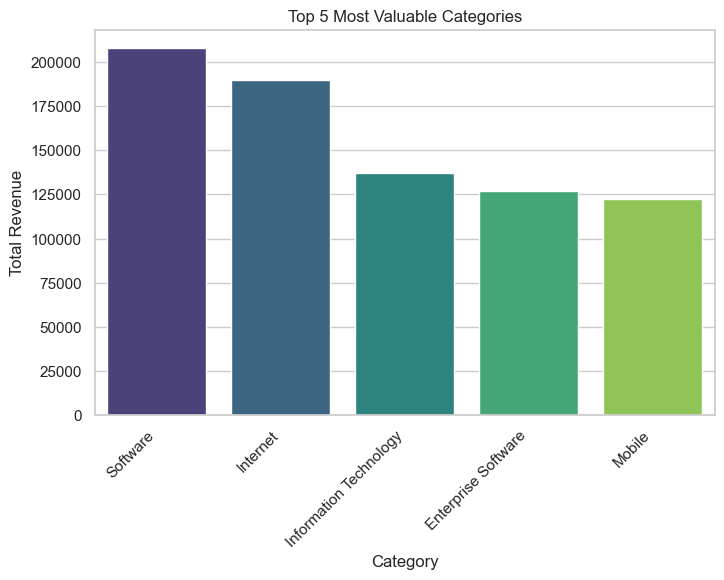

In [12]:

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x=top5_categories.index, y=top5_categories.values, palette="viridis")

# Set plot labels and title
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.title("Top 5 Most Valuable Categories")


plt.xticks(rotation=45, ha='right')


plt.show()


As we can see, the top 5 most valuable categories are : 
- Software
- Internet
- Information Technology
- Enterprise Software 
- Mobile


## 3. Which company has the `largest number of acquisitions`?


#### Find the `type of acquisition` and get the `number for each type`

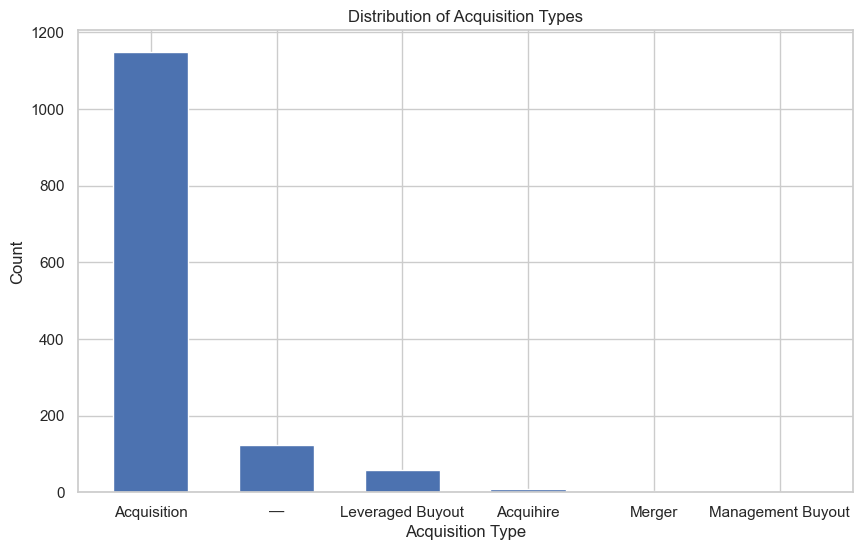

ACQUISITION_TYPE
Acquisition          1148
—                     122
Leveraged Buyout       57
Acquihire               8
Merger                  4
Management Buyout       1
Name: count, dtype: int64


In [13]:
type_of_acquisition = df_acquisition['ACQUISITION_TYPE'].value_counts()


plt.figure(figsize=(10, 6))
plt.bar(type_of_acquisition.index, type_of_acquisition.values, width=0.6)

# Add labels and title
plt.xlabel('Acquisition Type')
plt.ylabel('Count')
plt.title('Distribution of Acquisition Types')

plt.show()
print(type_of_acquisition)

##### As we can see, we don't really know what "-" is, let's assume it's an acquisition, but that the dataset doesn't detail what type it is  

In [14]:

company_acquisition_counts = df_acquisition['COMPANY_NAME'].value_counts()


company_with_most_acquisitions = company_acquisition_counts.idxmax()

print(f"The company with the most acquisitions is: {company_with_most_acquisitions}")


acquisitions = df_acquisition[df_acquisition['COMPANY_NAME'] == company_with_most_acquisitions]

acquisition_type_counts = acquisitions['ACQUISITION_TYPE'].value_counts()

print("Number of occurrences for each type of acquisition for Microsoft:")
print(acquisition_type_counts)


The company with the most acquisitions is: Cisco
Number of occurrences for each type of acquisition for Microsoft:
ACQUISITION_TYPE
Acquisition    115
—               23
Acquihire        1
Name: count, dtype: int64


##### `Top 5 companies` with the most `acquisitions `

In [15]:


# Get the top 5 companies with the most acquisitions
top_5_companies_acquisitions = df_acquisition['COMPANY_NAME'].value_counts().nlargest(5).index

# Create a list to store the dataframes for each top company
top_companies_acquisitions_dataframes = []

# Iterate over the top 5 companies and retrieve their acquisitions
for company in top_5_companies_acquisitions:
    acquisitions = df_acquisition[df_acquisition['COMPANY_NAME'] == company]
    top_companies_acquisitions_dataframes.append(acquisitions)

# Concatenate the dataframes for the top companies
top_companies_acquisitions = pd.concat(top_companies_acquisitions_dataframes)

# Count the occurrences of each type of acquisition for the top companies
acquisition_type_counts = top_companies_acquisitions['ACQUISITION_TYPE'].value_counts()

# Print the results
print("Top 5 Companies with the Most Acquisitions:")
print(top_5_companies_acquisitions)
print("\nNumber of occurrences for each type of acquisition for the Top 5 Companies:")
print(acquisition_type_counts)



Top 5 Companies with the Most Acquisitions:
Index(['Cisco', 'Google', 'Apollo', 'Medtronic', 'Intel'], dtype='object', name='COMPANY_NAME')

Number of occurrences for each type of acquisition for the Top 5 Companies:
ACQUISITION_TYPE
Acquisition         210
—                    65
Leveraged Buyout     19
Acquihire             2
Name: count, dtype: int64


 ##### From now, let's assume that "-" is just a `residual data`. Let's get the `company with the highest Acquisition`

In [16]:



acquisition_df = df_acquisition[df_acquisition['ACQUISITION_TYPE'] != '-']
company_acquisition_counts = acquisition_df['COMPANY_NAME'].value_counts()

company_with_most_acquisitions = company_acquisition_counts.idxmax()

number_of_acquisitions = company_acquisition_counts.max()

print(f"The company with the most 'Acquisition' occurrences is: {company_with_most_acquisitions}")
print(f"Number of 'Acquisition' occurrences for {company_with_most_acquisitions}: {number_of_acquisitions}")


The company with the most 'Acquisition' occurrences is: Cisco
Number of 'Acquisition' occurrences for Cisco: 139


## 4. Which `type of funding` has the most `money raised `

In [17]:

# best_type_funding = df_investment.groupby(["MONEY_RAISED_USD"]).mean()
funding_type_mean = df_investment.groupby('FUNDING_TYPE')['MONEY_RAISED_CONVERTED'].mean()
best_type_funding = funding_type_mean.sort_values(ascending=False)
best_type_funding

print(f"The type of funding that raised the most money is: {best_type_funding.idxmax()} with an average amount of {best_type_funding.max():,.2f} USD.")


The type of funding that raised the most money is: Post-IPO Secondary with an average amount of 1,309,284,517.08 USD.


##### The `type of funding that raised the most money` is: `Post-IPO Secondary` with an average amount of 1,309,284,517.08 USD.

## 5. How many companies have received `at least one round of investment` and which company has the `most round of investment`?

In [18]:
df_unique_companies = df_investment.drop_duplicates(subset='COMPANY_NAME')
#print(df_unique_companies)

# Assuming that if a company is in df_investment it means he has at least one investment. Count the number of companies with at least one round of investment
num_companies_with_investment = df_unique_companies['COMPANY_NAME'].count()

print(f"The number of companies with at least one round of investment is: {num_companies_with_investment}")

The number of companies with at least one round of investment is: 926


##### We want to know the `total number of funding rounds for each company`

In [19]:

# Calculate the total number of funding rounds for each company
total_funding_rounds = df_investment.groupby('COMPANY_NAME').size().reset_index(name='TOTAL_FUNDING_ROUNDS')

# Sort the result in descending order of the total number of funding rounds
total_funding_rounds = total_funding_rounds.sort_values(by='TOTAL_FUNDING_ROUNDS', ascending=False)

# Print the result
print("Total Number of Funding Rounds for Each Company (Descending Order):")
print(total_funding_rounds)

company_most_rounds = total_funding_rounds.iloc[0]['COMPANY_NAME']
print("\nCompany with the Most Funding Rounds:")
print(company_most_rounds)


Total Number of Funding Rounds for Each Company (Descending Order):
                                 COMPANY_NAME  TOTAL_FUNDING_ROUNDS
787                                     Tesla                    35
552                                       Ola                    25
814                                      Uber                    20
902                                    Zomato                    20
300                                  Flipkart                    19
..                                        ...                   ...
155                                 Chainlink                     1
73                                         BP                     1
74                                         BT                     1
570                                    Orange                     1
175  Cloud Native Computing Foundation (CNCF)                     1

[926 rows x 2 columns]

Company with the Most Funding Rounds:
Tesla


##### `Tesla` is the company with the most investment rounds

## 6. Which Company has the `most money_raised thanks to investment`

In [20]:


# Group by COMPANY_NAME and sum the MONEY_RAISED_CONVERTED for each company
total_money_raised_by_company = df_investment.groupby("COMPANY_NAME")["MONEY_RAISED_CONVERTED"].sum()

# Get the top 10 companies
top_10_companies = total_money_raised_by_company.nlargest(10)
company_with_max_money_raised = total_money_raised_by_company.idxmax()
max_money_raised = total_money_raised_by_company.max()


print("Top 10 companies by total money raised:")
for company, amount in top_10_companies.items():
    print(f"{company}: ${amount:,}")

print(f"\nCompany with the maximum money raised:")
print(f"{company_with_max_money_raised}: ${max_money_raised:,.2f}")


Top 10 companies by total money raised:
Reliance Jio: $24,454,731,338.07573
Tesla: $22,941,467,409.623444
Facebook: $19,509,617,488.0
Ant Group: $18,500,000,000.0
Meituan: $17,288,000,000.0
Uber: $17,213,700,000.0
Didi: $15,650,800,000.0
BP: $12,000,000,000.0
Sberbank: $11,600,000,000.0
Siemens: $8,971,700,000.0

Company with the maximum money raised:
Reliance Jio: $24,454,731,338.08


## 7. What is the `Investment` the` most valuable` ?


In [21]:

# Group by 'FUNDING_TYPE' and calculate the sum of 'MONEY_RAISED' for each funding type
total_money_raised_by_funding_type = df_investment.groupby('FUNDING_TYPE')['MONEY_RAISED_CONVERTED'].sum().reset_index(name='TOTAL_MONEY_RAISED')

# Sort the result by ascending order based on the total money raised
sorted_money_raised_funding_types = total_money_raised_by_funding_type.sort_values(by='TOTAL_MONEY_RAISED', ascending=False)
max_money_raised_funding_type = total_money_raised_by_funding_type.loc[total_money_raised_by_funding_type['TOTAL_MONEY_RAISED'].idxmax()]

# Print the sorted result
print("Funding Type that Raised the Most Money:")
print(max_money_raised_funding_type['FUNDING_TYPE'])
print("Funding Types Sorted by Total Money Raised (Ascending Order):")
print(sorted_money_raised_funding_types)



Funding Type that Raised the Most Money:
Post-IPO Equity
Funding Types Sorted by Total Money Raised (Ascending Order):
                FUNDING_TYPE  TOTAL_MONEY_RAISED
10           Post-IPO Equity        102208257436
9              Post-IPO Debt         77094588708
13            Private Equity         71564933988
19                  Series C         53718212464
21                  Series E         41180160357
20                  Series D         39112230640
27  Venture - Series Unknown         38799185891
2            Corporate Round         36650339635
22                  Series F         33210822346
3             Debt Financing         29811786531
18                  Series B         29356121325
17                  Series A         21093669194
23                  Series G         16979982930
11        Post-IPO Secondary         11783560654
15          Secondary Market          8019477956
24                  Series H          7908456675
7      Initial Coin Offering          4542700000

## 8. Which type of funding is the `most used nowadays`

Let's define some `type of fundings` :
1. `Series A` = The term gets its name from the preferred stock sold to investors at this stage. In this round, it's important to have a plan for developing a business model that will generate long-term profit.

2. `Series B` = Series B rounds are about taking businesses to the next level, past the development stage. Investors help startups get there by expanding market reach. Companies that have gone through seed and Series A funding rounds have already developed substantial user bases and have proven to investors that they are prepared for success on a larger scale. Series B funding is used to grow the company so that it can meet these levels of demand.

3. `Series C` = Businesses that raise Series C funding are already quite successful. These companies look for additional funding to help them develop new products, expand into new markets, or even acquire other companies. In Series C rounds, investors inject capital into successful businesses in an effort to receive more than double that amount back. Series C funding focuses on scaling the company, growing as quickly and successfully as possible.

4. `Seed` = Seed funding is the first official equity funding stage. It typically represents the first official money a business venture or enterprise raises. Some companies never extend beyond seed funding into Series A rounds or beyond. This early financial support is akin to watering the seed planted during pre-seeding.

5. `Venture` = From the Venture Capital (VC),is a sum of money investors commit for investment in early-stage companies. The investors who supply the fund with money are designated as limited partners. The person who manages the fund is called the general partner.

6. `IPO` = Initial Public Offering, it's the introduction of companies in the public by sale of its stocks to generate public

In [22]:
df_type_funding = df_investment["FUNDING_TYPE"].value_counts()
max_funding_type = df_type_funding.idxmax()

print(f"The type of funding the most used nowadays is : {max_funding_type}")
print(df_type_funding)

The type of funding the most used nowadays is : Series A
FUNDING_TYPE
Series A                    772
Series B                    662
Series C                    549
Seed                        538
Venture - Series Unknown    362
Series D                    351
Series E                    257
Debt Financing              225
Post-IPO Equity             195
Series F                    143
Private Equity              139
Grant                        86
Post-IPO Debt                81
Pre-Seed                     77
Corporate Round              74
Series G                     64
Angel                        62
Convertible Note             57
Secondary Market             55
Equity Crowdfunding          45
Funding Round                35
Series H                     30
Initial Coin Offering        11
Series J                     10
Series I                      9
Post-IPO Secondary            9
Product Crowdfunding          6
Non-equity Assistance         5
Name: count, dtype: int64


##### Illustration of the `distribution of types of funding`

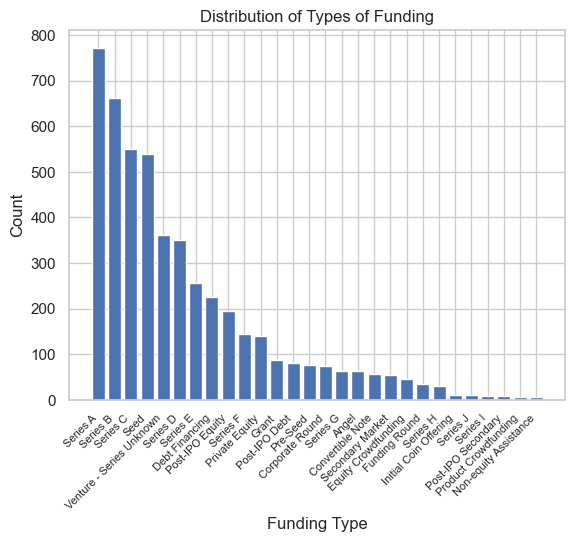

The type of funding most used nowadays is: Series A
FUNDING_TYPE
Series A                    772
Series B                    662
Series C                    549
Seed                        538
Venture - Series Unknown    362
Series D                    351
Series E                    257
Debt Financing              225
Post-IPO Equity             195
Series F                    143
Private Equity              139
Grant                        86
Post-IPO Debt                81
Pre-Seed                     77
Corporate Round              74
Series G                     64
Angel                        62
Convertible Note             57
Secondary Market             55
Equity Crowdfunding          45
Funding Round                35
Series H                     30
Initial Coin Offering        11
Series J                     10
Series I                      9
Post-IPO Secondary            9
Product Crowdfunding          6
Non-equity Assistance         5
Name: count, dtype: int64


In [23]:

df_type_funding = df_investment['FUNDING_TYPE'].value_counts()

# Create a bar plot
plt.bar(df_type_funding.index, df_type_funding.values)

# Add labels and title
plt.xlabel('Funding Type')
plt.ylabel('Count')
plt.title('Distribution of Types of Funding')

plt.xticks(fontsize=8, rotation=45, ha="right")


# Show the plot
plt.show()

# Find the most common funding type
max_funding_type = df_type_funding.idxmax()
print(f"The type of funding most used nowadays is: {max_funding_type}")
print(df_type_funding)

## 9. Which company `acquired the most` and for `how much`



In [24]:
# Calculate the total number of funding rounds for each company
total_acquisition_per_company = df_acquisition.groupby('COMPANY_NAME').size().reset_index(name='TOTAL_ACQ_PER_COMPANY')

# Sort the result in descending order of the total number of funding rounds
total_acquisition_per_company = total_acquisition_per_company.sort_values(by='TOTAL_ACQ_PER_COMPANY', ascending=False)

# Print the result
print("Total Number of Funding Rounds for Each Company (Descending Order):")
print(total_acquisition_per_company)

# best_type_funding = df_investment.groupby(["MONEY_RAISED_USD"]).mean()
company_acquisition = df_acquisition.groupby('COMPANY_NAME')['PRICE_CONVERTED'].mean().sort_values(ascending=False)
print(company_acquisition)
print(company_acquisition.idxmax())
print(f"The company that spent the most on acquisition is : {company_acquisition.idxmax()} with an average amount of {best_type_funding.max():,.2f} USD.")

df_companies = df_acquisition.drop_duplicates(subset='COMPANY_NAME')
#print(df_unique_companies)



Total Number of Funding Rounds for Each Company (Descending Order):
    COMPANY_NAME  TOTAL_ACQ_PER_COMPANY
31         Cisco                    139
69        Google                     43
9         Apollo                     41
101    Medtronic                     37
82         Intel                     36
..           ...                    ...
79       Infobip                      1
78     IndiaMART                      1
77        InMobi                      1
76    Ideanomics                      1
213         ipsy                      1

[214 rows x 2 columns]
COMPANY_NAME
Charter Communications                     56000000000
Pfizer                                     13574375000
The Walt Disney Company                    12695714286
Liberty Global                              9603655563
SoftBank                                    9137352992
                                               ...    
IndiaMART                                      2000000
Argo AI                       

##### As we can see, the company with most acquisitions is `Cisco` by far (139). 
##### The company that spent the most on acquisitions is `Charter Commmunications with an Acquisition of Spectrum for 56.000.000.000$` 

## 10. Which of these `companies have CEOs graduated from a top school`? We need to use `fuzzywuzzy` to keep a `margin of error` for the school's name

In [25]:
%%time


print("There is no CEO from ESCP EUROPE, so we can conclude that there is any CEO graduated from a top school but let's give the list of the CEO graduated from other schools.")

from fuzzywuzzy import process

# Assume df_employee is your DataFrame

# Define a list of top schools
top_schools = ['Harvard Business School', 'Stanford University', 'Massachusetts Institute of Technology', 'Princeton University', 'Yale University', 
               'Columbia University', 'University of Chicago', 'ESCP EUROPE', 'Boston College', 'Indian Institute of Technology','Imperial College London', 'University of Oxford',
               'University College London', 'UCL', 'Berkeley', 'University of Pennsylvania', 'Cornell University', 'Melbourne University', 'Warwick Business School', '']

# Function to match school names using fuzzywuzzy
def match_school(school_name):
    if pd.isna(school_name):  # Check for NaN values
        return None
    return process.extractOne(str(school_name), top_schools)

# Apply the function to each row in the 'ATTENDED_SCHOOLS' column
df_employee['matched_school'] = df_employee['ATTENDED_SCHOOLS'].apply(match_school)

# Filter rows where the match score is above a certain threshold (adjust as needed)
threshold = 60
df_filtered = df_employee[df_employee['matched_school'].apply(lambda x: x[1] >= threshold if x is not None else False)]

# Extract CEOs from top schools
ceos_from_top_schools = df_filtered[(df_filtered['JOB_TITLES'].str.contains('CEO', case=False)) & (df_filtered['matched_school'].apply(lambda x: x[0] if x is not None else None).isin(top_schools))]

# Split CEO details when there is more than one CEO for a company
ceos_split = ceos_from_top_schools.assign(ATTENDED_SCHOOLS=ceos_from_top_schools['ATTENDED_SCHOOLS'].str.split(', ')).explode('ATTENDED_SCHOOLS')

# Group CEOs by company and aggregate school names
ceos_grouped = ceos_split.groupby(['COMPANY_NAME', 'EMPLOYEE_MD5']).agg({
    'ATTENDED_SCHOOLS': lambda x: ', '.join(x),
}).reset_index()

# Group by company to get CEO count and aggregated school names
ceos_final_grouped = ceos_grouped.groupby('COMPANY_NAME').agg({
    'EMPLOYEE_MD5': 'count',
    'ATTENDED_SCHOOLS': lambda x: ', '.join(x),
}).reset_index()

# Rename columns for clarity
ceos_final_grouped.columns = ['COMPANY_NAME', 'CEO_COUNT', 'ATTENDED_SCHOOLS']
ceos_final_grouped_sorted = ceos_final_grouped.sort_values(by='CEO_COUNT', ascending=False).reset_index(drop=True)

# Print the result

ceos_final_grouped
print("CEOs from top schools grouped by company:")
display(ceos_final_grouped_sorted)
pd.set_option('max_colwidth', 900)

There is no CEO from ESCP EUROPE, so we can conclude that there is any CEO graduated from a top school but let's give the list of the CEO graduated from other schools.
CEOs from top schools grouped by company:


,COMPANY_NAME,CEO_COUNT,ATTENDED_SCHOOLS
0,Mayo Clinic,3,"Franklin and Marshall College, University of..."
1,Siemens,3,"Wake Forest University, University of Regens..."
2,Investcorp,3,"Fordham University, Columbia University, Ha..."
3,Microsoft,3,Mangalore University University of Chicago Un...
4,1mg,2,Harvard Business School Indian Institute of T...
...,...,...,...
289,Goldbelly,1,Vanderbilt University
290,GoodRx,1,Tufts University
291,Grubhub,1,Michigan State University University of Chicago
292,HackerOne,1,Aalto University School of Science


CPU times: total: 43.9 s
Wall time: 44 s


# `SUCCESS STORY based on the DataFrame`

Tesla and Google
* `Info` (creation / type of services)
* `Mean() Investment` compare to the global mean() investment of the df
* `Mean() number acquisition` & mean() `value expenses` of acquisition compare to the global value of df
* Check `employee and CEO from top schools` to justify success 
* `Comparison between the two companies`, why one is so much more `successful` than the other



* Reminder of the Top 5 most valuable categories:
* `Software`                 207861
* `Internet `                189747
* `Information Technology`   137120
* `Enterprise Software`      127012
* `Mobile`                   122698


##### `COMPARAISON CATEGORY`

In [26]:
print(df_category.loc[df_company['COMPANY_NAME'] == "Tesla"])
print(df_category.loc[df_company['COMPANY_NAME'] == "Google"])

# Assuming df_category has a column named 'COMPANY_NAME' to match with df_company
tesla_categories = df_category.loc[df_category['COMPANY_NAME'] == "Tesla", 'CATEGORY'].tolist()
google_categories = df_category.loc[df_category['COMPANY_NAME'] == "Google", 'CATEGORY'].tolist()

# Print sentences listing the categories for each company
print(f"\nCategories for Tesla: {', '.join(tesla_categories)}")
print(f"\nCategories for Google: {', '.join(google_categories)}")


   COMPANY_NAME               CATEGORY  MAPPING_REVENU
65        Tesla             Automotive             300
65        Tesla    Autonomous Vehicles             300
65        Tesla       Electric Vehicle             300
65        Tesla            Electronics             300
65        Tesla  Innovation Management             300
    COMPANY_NAME                CATEGORY  MAPPING_REVENU
508       Google              Ad Network           10000
508       Google      Blogging Platforms           10000
508       Google           Collaboration           10000
508       Google                   Email           10000
508       Google     Enterprise Software           10000
508       Google  Information Technology           10000
508       Google           Search Engine           10000
508       Google                Software           10000
508       Google         Video Streaming           10000

Categories for Tesla: Automotive, Autonomous Vehicles, Electric Vehicle, Electronics, Innovation Ma

`Funding date for each company`

In [27]:
from dateutil.parser import parse
import pandas as pd

def get_founding_date(company_name):
    row = df_company.loc[df_company["COMPANY_NAME"] == company_name]
    if not row.empty:
        founded_on = row["FOUNDED_ON"].iloc[0]
        if founded_on.isdigit():
            return f"{founded_on}-01-01"
        else:
            try:
                parse(founded_on)
                return founded_on
            except ValueError:
                return None  # Invalid date format
    return None

# Example: Get founding date for "Apollo"
Tesla_founding_date = get_founding_date("Tesla")
Google_founding_date = get_founding_date("Google")

if Tesla_founding_date:
    print(f"The founding date of Tesla is {Tesla_founding_date}.")
else:
    print("No founding date found for Tesla.")

if Google_founding_date:
    print(f"The founding date of Google is {Google_founding_date}.")
else:
    print("No founding date found for Google.")


The founding date of Tesla is Jan 1, 2003.
The founding date of Google is 1998-01-01.


##### The founding date of Tesla is Jan 1, 2003 and the founding date of Google is Jan 1, 1998.

#### `Investment for Tesla & Google and the comparaison of the mean()`

In [28]:

# Group by COMPANY_NAME and sum the MONEY_RAISED_CONVERTED for each company
total_money_raised_by_company = df_investment.groupby("COMPANY_NAME")["MONEY_RAISED_CONVERTED"].sum()

# Filter for Tesla and Google
tesla_google_money_raised = total_money_raised_by_company.loc[["Tesla", "Google"]]

# Print the total money raised for Tesla and Google
print("Total money raised for Tesla and Google:")
for company, amount in tesla_google_money_raised.items():
    print(f"{company}: ${amount:,.2f}")


Total money raised for Tesla and Google:
Tesla: $22,941,467,409.62
Google: $63,100,000.00


#### `Acquisition for Tesla & Google and the comparaison of the mean()`

In [29]:
# Calculate the mean of the entire DataFrame excluding Tesla and Google
mean_money_raised_all_companies = total_money_raised_by_company.mean()

# Print the mean value
print(f"Mean money raised for other companies: ${mean_money_raised_all_companies:,.2f}")

# Compare the total money raised for Tesla and Google with the mean
for company, amount in tesla_google_money_raised.items():
    if amount > mean_money_raised_all_companies:
        print(f"{company} has raised more than the mean.")
    elif amount < mean_money_raised_all_companies:
        print(f"{company} has raised less than the mean.")
    else:
        print(f"{company} has raised the same as the mean.")


Mean money raised for other companies: $692,146,906.57
Tesla has raised more than the mean.
Google has raised less than the mean.



*The displayed results indicate that Google has raised less money from investments compared to the mean of other companies. However, it's important to note that Google, as a part of Alphabet Inc., is a well-established and highly profitable company. Unlike startups or companies in need of significant funding for growth, mature companies like Google may not actively seek or require substantial investment funding.*

*There are several `reasons why Google may not raise a lot of money from investment:`*

*`Profitability`: Google is a highly profitable company with diverse revenue streams, including advertising, cloud services, and hardware. It may not rely heavily on external investments to fund its operations and expansion.*

*`Established Financial Position`: Being part of Alphabet Inc., Google has a strong financial position and may not need external funding for day-to-day operations or strategic initiatives.*

*`Limited Need for Capital`: Established companies often generate enough revenue internally to fund their operations, research and development, and other projects. They may not need to seek external capital as aggressively as startups.*

*`Strategic Focus`: Google may prioritize organic growth and strategic investments over raising capital through external funding rounds.*

*`Risk Management`: Larger companies like Google may prefer to manage their financial risks and avoid dilution of ownership by relying less on external investments.*

*It's essential to consider the specific financial strategy and business model of Google when interpreting its funding activities. If you have access to Google's financial reports or official statements, they can provide more insights into the company's financial health and strategy.*


#### `Mean() number acquisition & mean() value expenses of acquisition compare to the global value of df`

In [30]:

# Group by COMPANY_NAME and sum the PRICE_CONVERTED for each company
total_acquisition_price = df_acquisition.groupby("COMPANY_NAME")["PRICE_CONVERTED"].sum()

# Filter for Tesla and Google
tesla_google_acquisition_price = total_acquisition_price.loc[["Tesla", "Google"]]

# Calculate the mean acquisition price for all companies
mean_acquisition_price_all = total_acquisition_price.mean()

# Print the results
print(f"\nMean acquisition price for all companies: ${mean_acquisition_price_all:,.2f}")

print("\nTotal acquisition price for Tesla and Google:")
for company, amount in tesla_google_acquisition_price.items():
    print(f"{company}: ${amount:,.2f}")

# Compare with the mean acquisition price
for company, amount in tesla_google_acquisition_price.items():
    if amount > mean_acquisition_price_all:
        print(f"{company} has an acquisition price higher than the mean.")
    elif amount < mean_acquisition_price_all:
        print(f"{company} has an acquisition price lower than the mean.")
    else:
        print(f"{company} has an acquisition price equal to the mean.")




Mean acquisition price for all companies: $8,615,959,710.51

Total acquisition price for Tesla and Google:
Tesla: $218,000,000.00
Google: $26,952,577,484.07
Tesla has an acquisition price lower than the mean.
Google has an acquisition price higher than the mean.


* Total money raised for Tesla and Google:
* Tesla: $218,000,000.00
* Google: $26,952,577,484.07

#### `Quality of employees & CEOs for the two companies`

In [31]:

top_schools = ['Harvard Business School', 'Stanford University', 'Massachusetts Institute of Technology', 'Princeton University', 'Yale University', 
               'Columbia University', 'University of Chicago', 'ESCP EUROPE', 'Boston College', 'Indian Institute of Technology','Imperial College London', 'University of Oxford',
               'University College London', 'UCL', 'Berkeley', 'University of Pennsylvania', 'Cornell University', 'Melbourne University', 'Warwick Business School', '']

# Function to match school names using fuzzywuzzy
def match_school(school_name):
    if pd.isna(school_name):  # Check for NaN values
        return None
    return process.extractOne(str(school_name), top_schools)


df_employee['matched_school'] = df_employee['ATTENDED_SCHOOLS'].apply(match_school)

# Filter rows where the match score is above a certain threshold 
threshold = 60
df_filtered = df_employee[df_employee['matched_school'].apply(lambda x: x[1] >= threshold if x is not None else False)]

# Group employees by company and aggregate school names
employees_grouped = df_filtered.groupby('COMPANY_NAME').agg({
    'EMPLOYEE_MD5': 'count',
    'ATTENDED_SCHOOLS': lambda x: ', '.join(x)  # Combine multiple school names
}).reset_index()


employees_grouped.columns = ['COMPANY_NAME', 'EMPLOYEE_COUNT', 'ATTENDED_SCHOOLS']

# Filter employees from top schools for Tesla and Google
employees_tesla_google = employees_grouped[employees_grouped['COMPANY_NAME'].isin(['Tesla', 'Google'])]

# Print the result for Tesla and Google
print("Employees from top schools for Tesla and Google:")
employees_tesla_google

for company in ['Google', 'Tesla']:
    employees_count = employees_tesla_google.loc[employees_tesla_google['COMPANY_NAME'] == company, 'EMPLOYEE_COUNT'].values
    if len(employees_count) > 0:
        print(f"\nNumber of employees from top schools for {company}: {employees_count[0]}")
    else:
        print(f"\nNo data available for {company}.")



Employees from top schools for Tesla and Google:

Number of employees from top schools for Google: 441

Number of employees from top schools for Tesla: 23


#### After comparing the two successful companies Tesla & Google as closely as possible in our Dataset analysis. We can conclude, at the end of this project, `the common points` of a successful company.
#### First of all, we've noticed that it's more interesting to be part of the `most popular business sectors` on the market today `(software, internet, information technology, enterprise software & mobile)`.
#### Secondly, `investing is often a good springboard for a company to build up assets` that will enable it to grow progressively richer over the long term. Our study shows that Google hasn't made many investments. This is due to the fact that, from the outset, Google has had a monopoly on its market, a higher profitability and a more different strategy.
#### Indeed, compared with Tesla and other companies, `Google has an aggressive acquisition strategy, enabling it to increase its monopoly and diversify its strategies and revenues`
#### Finally, we can see that Google, unlike Tesla, selects `top-quality employees from the best schools`.

